In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import skbio
#current_file="rearrangement_updated_32720.csv"
current_file="kmers042720.csv"

In [8]:
df2=pd.read_csv(current_file)
div=pd.read_csv(current_file)
reyni=pd.read_csv(current_file)
print(df2.head())
print(div.head())

             k-mer  10A  10B   11A   11B  13A  13B  14A  14B  15D  ...   6B  \
0  TATGCCATGCTTGTC  901  947  1934  1966  849  734  792  799  722  ...  726   
1  TTATCTATGCCATGC  902  952  1930  1965  850  729  788  799  723  ...  726   
2  ACAACTTTTCTACTA  889  945  1934  1950  833  705  786  796  704  ...  692   
3  TTTTCTACTACTATA  887  946  1933  1951  833  705  785  795  705  ...  692   
4  TACTACTATACCATT  886  947  1934  1951  833  705  785  797  705  ...  693   

    7A   7B   8A   8B   9A   9B   WT  WT_0.125  WT_0.25rxn  
0  656  731  673  749  720  680  719       659         748  
1  654  734  673  746  719  679  720       655         748  
2  638  719  661  738  714  671  658       627         713  
3  638  719  662  739  714  672  658       625         712  
4  639  718  662  739  719  672  659       625         712  

[5 rows x 49 columns]
             k-mer  10A  10B   11A   11B  13A  13B  14A  14B  15D  ...   6B  \
0  TATGCCATGCTTGTC  901  947  1934  1966  849  734  792  

In [10]:
#df2.set_index("type", inplace=True)
df2.set_index("k-mer", inplace=True)

In [11]:
ax = df2.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)

KeyError: 'NHLC_1A'

In [12]:
#adding one to every field for psuedocounting purposes
KLdf = df2
KLdf = KLdf.astype("float64")
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        KLdf.loc[key2][key] += 1
        
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        if KLdf.loc[key2][key] <= 0:
            print("error in",key2,key)

In [13]:
#Convert dataframes to frequencies of each column
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        value = KLdf.loc[key2][key]
        KLdf.loc[key2][key] = (value / sum(row))

In [14]:
# calculating KL distance between two distrubtions. Distance(P||Q) = summation[Pi*Log2(Pi/Qi)]

KLresults = {}
for key, row in KLdf.iteritems():
    for key2, row2 in KLdf.iteritems():
        if key == key2:
            continue
        data = row * np.log2(row/row2)
        resultkey = key + " " + key2
        reversekey = key2 + " " + key
        if reversekey in KLresults:
            KLresults[reversekey] += sum(data)
        else:
            KLresults[resultkey] = sum(data)

In [15]:
resultframe = pd.DataFrame.from_dict(KLresults, orient = 'index', columns = ["KL_Distance"])

In [16]:
#Showing how to pull values from a specific sample. NHLC_16B as example:
print(resultframe[resultframe.index.str.contains("16B-")])

Empty DataFrame
Columns: [KL_Distance]
Index: []


,KL_Distance
10A 10B,5.311902
10A 11A,46.549530
10A 11B,46.253208
10A 13A,38.526023
10A 13B,38.829223
...,...
9B WT_0.125,2.283216
9B WT_0.25rxn,3.098681
WT WT_0.125,3.159132
WT WT_0.25rxn,2.390915


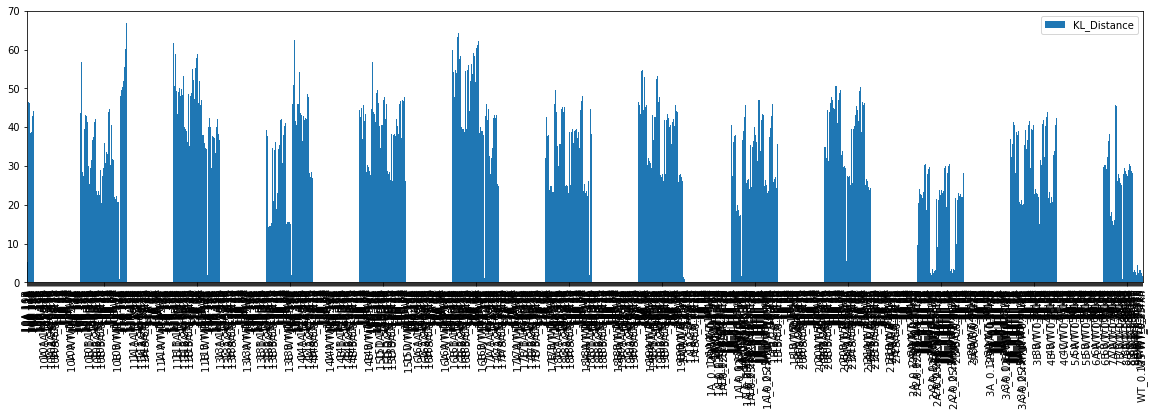

In [17]:
#Averaging KL Diversity per sample to make data more easily digestable
groups = {}
groupcount = {}
finalavg = {}
for key, row in resultframe.iteritems():
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] = 0
        groupcount[group] = 0
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] += row2
        groupcount[group] += 1

for key,value in groups.items():
    finalavg[key] = value/groupcount[key]

avgresults = pd.DataFrame.from_dict(finalavg, orient = 'index', columns = ["KL_Distance"])
display(avgresults)
ax = avgresults.plot.bar(y="KL_Distance", figsize = (20,5), rot=90)

In [18]:
print(skbio.diversity.get_alpha_diversity_metrics())
print(skbio.diversity.get_beta_diversity_metrics())

['ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'faith_pd', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_ci', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_otus', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong']
['unweighted_unifrac', 'weighted_unifrac']


In [20]:
#Preparing Diverity Calculations. Obtaining a clean dataframe without frequencies.
display(div)
#div = div.drop("type", axis=1)
div = div.drop("k-mer", axis=1)
div = div.transpose()
display(div)

,k-mer,10A,10B,11A,11B,13A,13B,14A,14B,15D,...,6B,7A,7B,8A,8B,9A,9B,WT,WT_0.125,WT_0.25rxn
0,TATGCCATGCTTGTC,901,947,1934,1966,849,734,792,799,722,...,726,656,731,673,749,720,680,719,659,748
1,TTATCTATGCCATGC,902,952,1930,1965,850,729,788,799,723,...,726,654,734,673,746,719,679,720,655,748
2,ACAACTTTTCTACTA,889,945,1934,1950,833,705,786,796,704,...,692,638,719,661,738,714,671,658,627,713
3,TTTTCTACTACTATA,887,946,1933,1951,833,705,785,795,705,...,692,638,719,662,739,714,672,658,625,712
4,TACTACTATACCATT,886,947,1934,1951,833,705,785,797,705,...,693,639,718,662,739,719,672,659,625,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,GTTGCTAGTTCCTGA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5270,ATGTAGGGTCCAGCC,0,0,0,0,0,0,11,13,0,...,0,0,0,0,0,0,0,0,0,0
5271,TAAGTGGTATAGTAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5272,CGGGCGTAGCCATCC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,5264,5265,5266,5267,5268,5269,5270,5271,5272,5273
10A,901,902,889,887,886,889,894,868,888,878,...,31,0,0,0,0,0,0,0,0,0
10B,947,952,945,946,947,940,940,937,939,941,...,3,0,0,0,0,0,0,0,0,0
11A,1934,1930,1934,1933,1934,1931,1932,1935,1934,1940,...,0,0,0,0,0,0,0,0,0,0
11B,1966,1965,1950,1951,1951,1947,1947,1941,1951,1943,...,0,0,0,0,0,0,0,0,0,0
13A,849,850,833,833,833,833,835,831,831,831,...,0,0,0,0,0,0,0,0,0,0
13B,734,729,705,705,705,703,704,703,704,702,...,0,0,0,0,0,0,0,0,0,0
14A,792,788,786,785,785,786,787,783,786,784,...,0,0,20,0,0,0,11,0,0,0
14B,799,799,796,795,797,796,799,796,798,796,...,0,0,16,0,0,0,13,0,0,0
15D,722,723,704,705,705,704,705,703,703,699,...,0,0,0,0,0,0,0,0,0,0
16A,512,514,502,501,501,504,505,529,504,532,...,0,0,0,0,0,25,0,0,0,0


In [21]:
diversity_results= pd.DataFrame()
diversity_results["Observed_Otus"]=skbio.diversity.alpha_diversity("observed_otus",div, ids=div.index)
diversity_results["Simpsons_Index"]=skbio.diversity.alpha_diversity("simpson",div, ids=div.index)
diversity_results["Simspons_Evenness_Measure_E"]=skbio.diversity.alpha_diversity("simpson_e",div, ids=div.index)
diversity_results["Shannon_Entropy"]=skbio.diversity.alpha_diversity("shannon",div, ids=div.index)
diversity_results["Fisher_Alpha"]=skbio.diversity.alpha_diversity("fisher_alpha",div, ids=div.index)


In [22]:
display(diversity_results)
#diversity_results.plot(figsize = (40,5), rot=90)

,Observed_Otus,Simpsons_Index,Simspons_Evenness_Measure_E,Shannon_Entropy,Fisher_Alpha
10A,3013,0.998447,0.213731,10.573545,528.385257
10B,3125,0.998297,0.187958,10.521421,551.517847
11A,2407,0.994521,0.075831,8.980683,395.992617
11B,2194,0.994008,0.076065,8.868474,356.084265
13A,3075,0.998764,0.263150,10.807790,532.012166
13B,3039,0.998894,0.297633,10.874930,532.628552
14A,3023,0.999026,0.339787,10.925950,525.830645
14B,2833,0.998952,0.336884,10.852178,481.715583
15D,2823,0.998833,0.303537,10.785255,488.326515
16A,3066,0.999104,0.364196,10.986159,546.880654


In [23]:
#Convert reyni dataframes to frequencies of each column
#reyni.set_index("type", inplace=True)
reyni.set_index("k-mer", inplace=True)
display(reyni)
reynisums=pd.Series(reyni.sum())
reynifreq = reyni / reynisums


,10A,10B,11A,11B,13A,13B,14A,14B,15D,16A,...,6B,7A,7B,8A,8B,9A,9B,WT,WT_0.125,WT_0.25rxn
k-mer,,,,,,,,,,,,,,,,,,,,,
TATGCCATGCTTGTC,901,947,1934,1966,849,734,792,799,722,512,...,726,656,731,673,749,720,680,719,659,748
TTATCTATGCCATGC,902,952,1930,1965,850,729,788,799,723,514,...,726,654,734,673,746,719,679,720,655,748
ACAACTTTTCTACTA,889,945,1934,1950,833,705,786,796,704,502,...,692,638,719,661,738,714,671,658,627,713
TTTTCTACTACTATA,887,946,1933,1951,833,705,785,795,705,501,...,692,638,719,662,739,714,672,658,625,712
TACTACTATACCATT,886,947,1934,1951,833,705,785,797,705,501,...,693,639,718,662,739,719,672,659,625,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTGCTAGTTCCTGA,0,0,0,0,0,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,0
ATGTAGGGTCCAGCC,0,0,0,0,0,0,11,13,0,0,...,0,0,0,0,0,0,0,0,0,0
TAAGTGGTATAGTAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
alphalist = [0,.99999,2,3,4]
reyniresults={}
for column in reynifreq:
    #print(reynifreq[column])
    listresults=[]
    for alpha in alphalist:
        columnsum=0
        for row in reynifreq[column]:
            if row > 0:
                columnsum+=row**alpha
                #print(columnsum)
            else:
                continue
        columnsum=columnsum**(1/(1-alpha))
        listresults.append(columnsum)
    reyniresults[column]=listresults
display(reyniresults)

{'10A': [3013.0,
  1523.9053914311444,
  643.9723100477919,
  392.1944740183808,
  311.7725962570995],
 '10B': [3125.0,
  1469.8309795748248,
  587.367492576152,
  360.8220132692298,
  291.245250305169],
 '11A': [2407.0,
  505.19875821947375,
  182.5247048290722,
  137.75314602760128,
  123.0139274607787],
 '11B': [2194.0,
  467.3951198492241,
  166.88742927402646,
  128.12291052106772,
  115.72735030056546],
 '13A': [3075.0,
  1792.5530813161497,
  809.1858654317969,
  478.4384033011796,
  375.3581005826807],
 '13B': [3039.0,
  1877.9447347649968,
  904.5078504983352,
  535.2774243394038,
  416.0534061100645],
 '14A': [3023.0,
  1945.5431557962731,
  1027.1746414277648,
  611.143064428571,
  460.3110385966743],
 '14B': [2833.0,
  1848.5595137365665,
  954.3910014071198,
  575.0462295373849,
  442.0608871795008],
 '15D': [2823.0,
  1764.7689297300437,
  856.8838106945323,
  513.4097353100926,
  401.75805457429686],
 '16A': [3066.0,
  2028.4550305845091,
  1116.6247259466961,
  670.6137

In [25]:
display(reynifreq)

,10A,10B,11A,11B,13A,13B,14A,14B,15D,16A,...,6B,7A,7B,8A,8B,9A,9B,WT,WT_0.125,WT_0.25rxn
k-mer,,,,,,,,,,,,,,,,,,,,,
TATGCCATGCTTGTC,0.005712,0.005964,0.011219,0.011670,0.004945,0.004600,0.004814,0.004644,0.004576,0.003453,...,0.004958,0.004535,0.004641,0.003849,0.004255,0.004537,0.004449,0.004973,0.004694,0.004884
TTATCTATGCCATGC,0.005718,0.005995,0.011196,0.011664,0.004950,0.004569,0.004790,0.004644,0.004583,0.003466,...,0.004958,0.004521,0.004660,0.003849,0.004238,0.004531,0.004443,0.004980,0.004666,0.004884
ACAACTTTTCTACTA,0.005636,0.005951,0.011219,0.011575,0.004851,0.004418,0.004778,0.004626,0.004462,0.003385,...,0.004726,0.004410,0.004565,0.003781,0.004193,0.004499,0.004390,0.004551,0.004466,0.004655
TTTTCTACTACTATA,0.005623,0.005957,0.011213,0.011581,0.004851,0.004418,0.004771,0.004620,0.004469,0.003379,...,0.004726,0.004410,0.004565,0.003786,0.004198,0.004499,0.004397,0.004551,0.004452,0.004649
TACTACTATACCATT,0.005617,0.005964,0.011219,0.011581,0.004851,0.004418,0.004771,0.004632,0.004469,0.003379,...,0.004733,0.004417,0.004559,0.003786,0.004198,0.004531,0.004397,0.004558,0.004452,0.004649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTGCTAGTTCCTGA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ATGTAGGGTCCAGCC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000067,0.000076,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TAAGTGGTATAGTAG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
reynidf = pd.DataFrame.from_dict(data=reyniresults, orient='columns')
reynidfl = pd.DataFrame.from_dict(data=reyniresults, orient='index', columns=alphalist)
reynidft = reynidfl.transpose()
display(reynidfl)
display(reynidft)

,0.00000,0.99999,2.00000,3.00000,4.00000
10A,3013.0,1523.905391,643.972310,392.194474,311.772596
10B,3125.0,1469.830980,587.367493,360.822013,291.245250
11A,2407.0,505.198758,182.524705,137.753146,123.013927
11B,2194.0,467.395120,166.887429,128.122911,115.727350
13A,3075.0,1792.553081,809.185865,478.438403,375.358101
13B,3039.0,1877.944735,904.507850,535.277424,416.053406
14A,3023.0,1945.543156,1027.174641,611.143064,460.311039
14B,2833.0,1848.559514,954.391001,575.046230,442.060887
15D,2823.0,1764.768930,856.883811,513.409735,401.758055
16A,3066.0,2028.455031,1116.624726,670.613796,507.545842


,10A,10B,11A,11B,13A,13B,14A,14B,15D,16A,...,6B,7A,7B,8A,8B,9A,9B,WT,WT_0.125,WT_0.25rxn
0.00000,3013.000000,3125.000000,2407.000000,2194.000000,3075.000000,3039.000000,3023.000000,2833.000000,2823.000000,3066.000000,...,2798.000000,3158.000000,3089.000000,2904.000000,2826.000000,2822.000000,2857.000000,3131.000000,3184.000000,3163.000000
0.99999,1523.905391,1469.830980,505.198758,467.395120,1792.553081,1877.944735,1945.543156,1848.559514,1764.768930,2028.455031,...,1674.073667,1865.825005,1681.196000,1955.481390,1900.319129,1793.652205,1824.506116,1792.758377,1873.503785,1842.538084
2.00000,643.972310,587.367493,182.524705,166.887429,809.185865,904.507850,1027.174641,954.391001,856.883811,1116.624726,...,781.789580,887.163413,756.499340,1069.385409,997.868783,857.585004,874.039261,802.885839,864.984535,848.876310
3.00000,392.194474,360.822013,137.753146,128.122911,478.438403,535.277424,611.143064,575.046230,513.409735,670.613796,...,470.863038,526.438060,449.177347,642.446742,594.729775,510.023760,520.108457,478.307529,512.903322,502.311469
4.00000,311.772596,291.245250,123.013927,115.727350,375.358101,416.053406,460.311039,442.060887,401.758055,507.545842,...,371.911776,408.929896,353.156816,488.530358,453.990933,398.671810,406.980451,378.049162,402.412721,393.440495


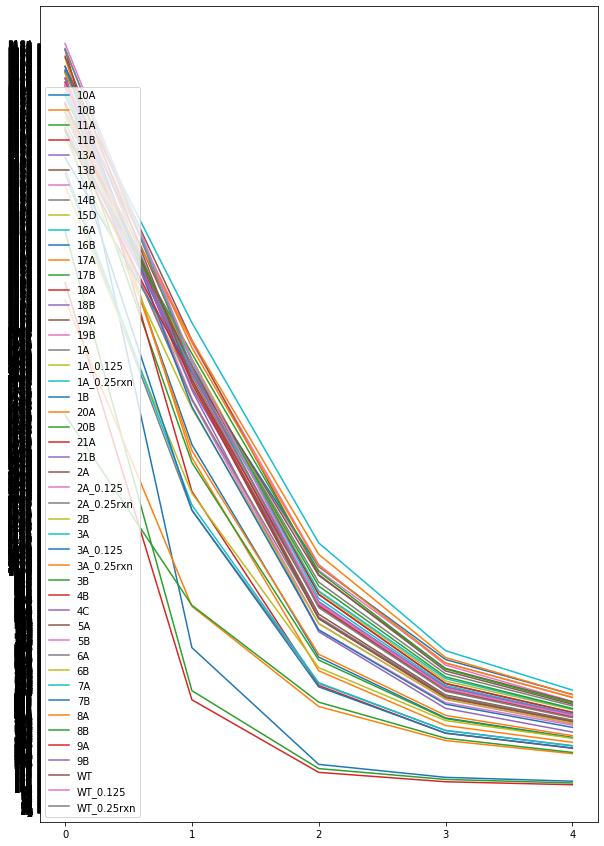

In [27]:
upperlim=int((reynidf.max(axis = 1)).max() + 1)
ax = reynidf.plot(figsize = (10,15), xticks=(0,1,2,3,4),yticks=(range(0,upperlim)))
ax.figure.savefig('figure.png')

['10A', '10B', '11A', '11B', '13A', '13B', '14A', '14B', '15D', '16A', '16B', '17A', '17B', '18A', '18B', '19A', '19B', '1A', '1A_0.125', '1A_0.25rxn', '1B', '20A', '20B', '21A', '21B', '2A', '2A_0.125', '2A_0.25rxn', '2B', '3A', '3A_0.125', '3A_0.25rxn', '3B', '4B', '4C', '5A', '5B', '6A', '6B', '7A', '7B', '8A', '8B', '9A', '9B', 'WT', 'WT_0.125', 'WT_0.25rxn']


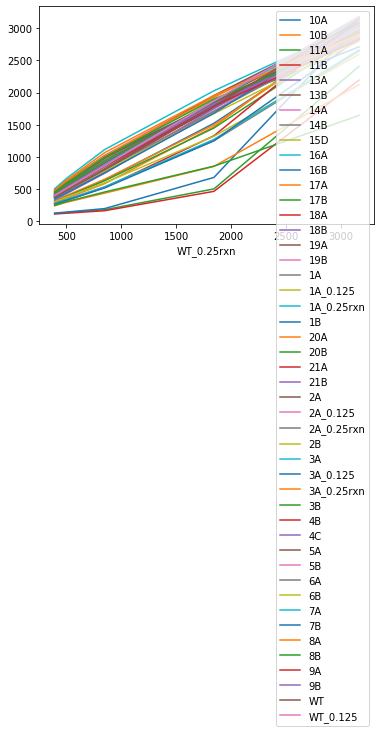

In [28]:
columnname=[]
for column in reynidft:
    columnname.append(column)
print(columnname)
    
reynidf.plot(x=column)
    